# Mushroom Fungi Classification Using Machine Learning

### Step 1: Setup and Import Libraries

#### Why this step?
##### `Pandas, NumPy` for Data manipulation
##### `Seaborn, Matplotlib` for Data visualization
##### `Sklearn` for Model training, data preprocessing and evaluation

In [4]:
# Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Step 2: Load Dataset

#### Why this step?
##### We need to load and inspect the dataset to understand the structure; what columns are available? values are clean or not? etc.

In [7]:
# Load dataset
df = pd.read_csv('mushrooms.csv')

# Display first few records
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
# Display last few records
df.tail(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [9]:
# Check dataset format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# Step 3: Data Preprocessing

### Why this step?
#### ML models can’t handle strings directly. We convert categories (like “edible” or “poisonous”) into numbers. Label encoding is good for tree-based models; for others, One-Hot Encoding can also be used.

In [12]:
# Check for missing values
df.isnull().sum()  # This dataset uses "?" to represent missing values, so we need to clean that manually; can Replace '?' with NaN.

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [13]:
# All columns are categorical, so we use LabelEncoder
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Step 4: Split Dataset

### Why this step?
#### We train the model on 70% of data and test on 30% to evaluate generalization. ``random_state`` ensures reproducibility.

In [16]:
# Check the columns to define the target (y) and features (X).
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [17]:
# Features and labels
X = df.drop(['class'], axis=1)  # Remaining all columns are stored in X (features).
y = df['class']  # edible = 0, poisonous = 1 after encoding  # class in y (target).

# Split into training and testing (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Check the Rows and Columns of X/y test and X/y train
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5686, 22), (2438, 22), (5686,), (2438,))

# Step 5: Train Machine Learning Models

### Why these models?
#### `Logistic Regression`: Good baseline model for binary classification.
#### `Decision Tree`: Easy to interpret and handles non-linearity.
#### `Random Forest`: Ensemble of trees; generally performs better than a single tree.

## Logistic Regression

In [22]:
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

## Decision Tree

In [24]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

## Random Forest

In [26]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Step 6: Evaluate Models

### Why this step?
#### To evaluate how well each model predicts:
#### `Accuracy`: Overall correctness
#### `Precision/Recall`: Important if we care about false positives/negatives
#### `Confusion Matrix`: Clear visual on where the model makes mistakes


Logistic Regression
Accuracy: 0.9487284659557014
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1257
           1       0.95      0.94      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



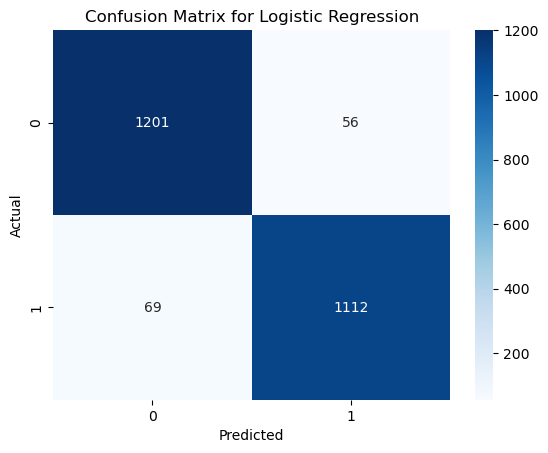


Decision Tree
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



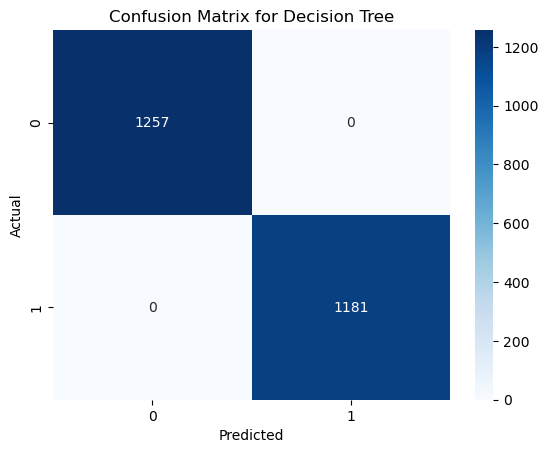


Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



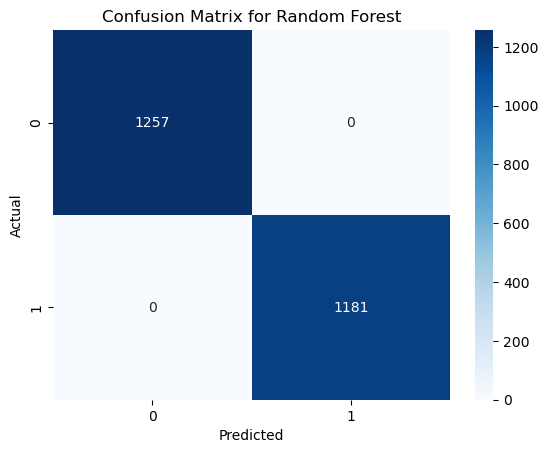

In [29]:
models = {
    'Logistic Regression': (log_preds, log_model),
    'Decision Tree': (dt_preds, dt_model),
    'Random Forest': (rf_preds, rf_model)
}

for name, (preds, model) in models.items():
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Logistic Regression
Accuracy: 0.9487284659557014
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1257
           1       0.95      0.94      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



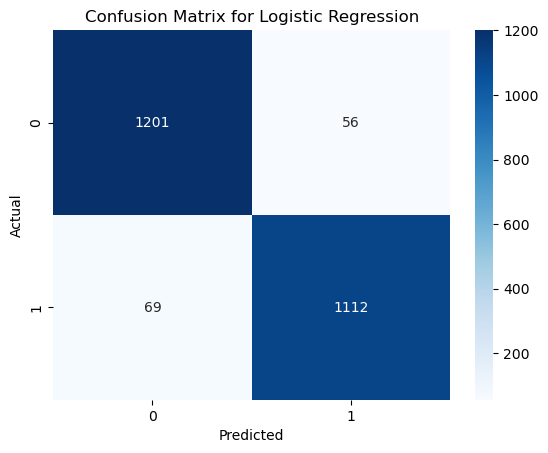


Decision Tree
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



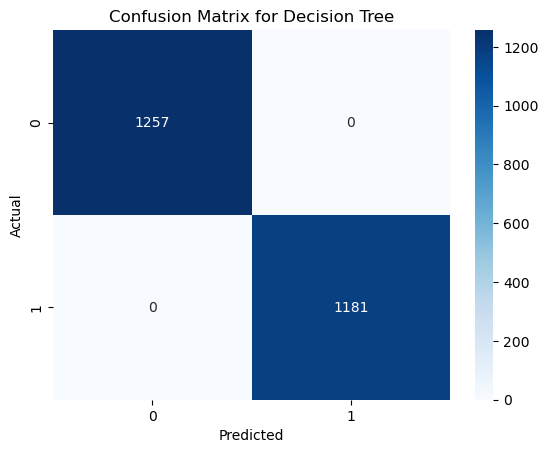


Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



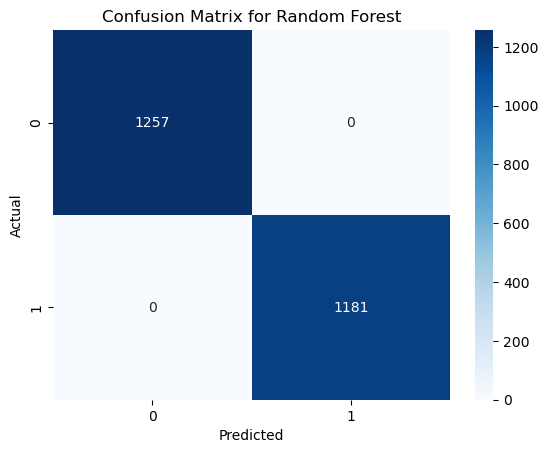

In [30]:
models = {
    'Logistic Regression': (log_preds, log_model),
    'Decision Tree': (dt_preds, dt_model),
    'Random Forest': (rf_preds, rf_model)
}

for name, (preds, model) in models.items():
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Step 7: Compare and Conclude

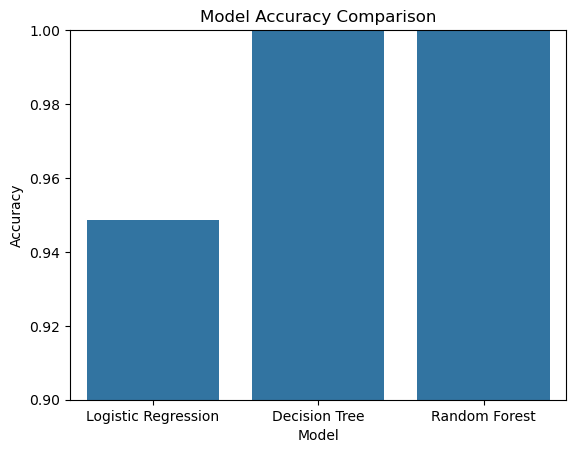

In [32]:
accuracies = {
    'Logistic Regression': accuracy_score(y_test, log_preds),
    'Decision Tree': accuracy_score(y_test, dt_preds),
    'Random Forest': accuracy_score(y_test, rf_preds)
}

# Convert to DataFrame for plotting
acc_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

# Plot
sns.barplot(data=acc_df, x='Model', y='Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1)
plt.show()